In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
data = fetch_ucirepo(id=468)

X = pd.DataFrame(data.data.features)
y = pd.Series(data.data.targets.values.ravel(), name='Revenue')

#codificação de variáveis categóricas

X_encoded = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])

#divisão dos dados - 80/20
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

#normalização dos dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#definição e configuração do MLP e hiperparametros

mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(100, 150),(50,100)],
    'activation': ['relu','tanh','logistic', 'identity'],
    'learning_rate_init': [0.001,0.0001],
    'alpha': [0.01,0.001],
    'solver': ['adam', 'sgd'],
    'max_iter': [500]
}
gs_mlp = GridSearchCV(mlp, params, cv = 3, verbose = 3,scoring = 'accuracy')

gs_mlp.fit(X_train, y_train)
print("Best parameters:\n", gs_mlp.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.866 total time=  35.0s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time=  28.7s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.879 total time=  32.2s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  42.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.893 total time=  51.4s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.891 total time=  59.5s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time= 1.0min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time= 1.0min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time= 1.1min
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.885 total time=  40.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.883 total time=  43.0s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.877 total time=  41.1s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.869 total time=  17.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.875 total time=  13.1s
[CV 3/3] END activation=relu, alpha=0.01, hidden_laye

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.900 total time=  17.6s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  16.3s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time=  16.7s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.881 total time=  11.6s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.881 total time=  11.5s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.877 total time=  16.1s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.876 total time=  34.3s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.866 total time=  32.2s
[CV 3/3] END activation=relu, alpha=0.001, hidden_lay

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time= 1.0min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time= 1.0min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time= 1.0min
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.883 total time=  42.1s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.880 total time=  38.9s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.878 total time=  36.6s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.878 total time=  15.8s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.868 total time=  16.6s
[CV 3/3] END activation=relu, alpha=0.001, hidd

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  17.5s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.892 total time=  18.4s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  16.6s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.883 total time=  11.5s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.882 total time=  11.3s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.875 total time=  12.9s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.877 total time= 1.1min
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time= 1.0min
[CV 3/3] END activation=tanh, alpha=0.01, hidden_la

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.901 total time= 1.1min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.901 total time= 1.1min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time= 1.1min
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.885 total time=  19.3s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.887 total time=  20.8s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.879 total time=  21.8s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time=  18.1s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.870 total time=  19.3s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.870 total time=  18.4s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  11.2s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.896 total time=  10.7s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.891 total time=  10.7s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  17.6s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  18.9s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  18.1s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=   7.4s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.887 total time=   7.1s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.881 total time=   7.3s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.877 total time=  56.7s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.868 total time=  56.8s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_lay

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time= 1.1min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time= 1.1min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time= 1.1min
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=  20.3s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.887 total time=  21.0s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.880 total time=  21.8s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.876 total time=  16.7s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.869 total time=  17.4s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.871 total time=  16.5s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.901 total time=  10.8s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.897 total time=   9.9s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.890 total time=   9.5s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.899 total time=  19.0s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  19.3s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  18.0s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=   8.0s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=   7.2s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.880 total time=   7.7s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.901 total time= 1.4min
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.897 total time= 1.4min
[CV 3/3] END activation=logistic, alpha=0.0

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.888 total time= 1.5min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.890 total time= 1.7min
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   3.4s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   4.9s
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   3.5s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time= 1.2min
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  59.4s
[CV 3/3] END activation=logistic, a

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.888 total time= 2.3min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.885 total time= 2.3min
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=  16.1s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   4.7s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.879 total time= 2.4min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=338.0min


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time= 2.4min
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time= 1.9min
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   8.3s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   9.1s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   8.9s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.899 total time=  47.8s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.892 total time=  46.9s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.887 total time=  47.4s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.4s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.5s


C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.879 total time=  55.6s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  40.4s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  37.5s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  40.1s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   3.5s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   3.8s
[CV 3/3] END activation=lo

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
optimized_mlp = MLPClassifier(
   hidden_layer_sizes = (50, 100),
   activation = 'tanh',
   alpha = 0.01,
   learning_rate_init = 0.0001,
   max_iter = 600,
   solver = 'adam',
    verbose = True
)
optimized_mlp.fit(X_train, y_train)
optimized_mlp_pred = optimized_mlp.predict(X_test)

Iteration 1, loss = 0.68032185
Iteration 2, loss = 0.55033878
Iteration 3, loss = 0.46270457
Iteration 4, loss = 0.40300894
Iteration 5, loss = 0.36309361
Iteration 6, loss = 0.33717980
Iteration 7, loss = 0.32040589
Iteration 8, loss = 0.30943722
Iteration 9, loss = 0.30245416
Iteration 10, loss = 0.29779294
Iteration 11, loss = 0.29470410
Iteration 12, loss = 0.29237966
Iteration 13, loss = 0.29089822
Iteration 14, loss = 0.28958631
Iteration 15, loss = 0.28884086
Iteration 16, loss = 0.28803411
Iteration 17, loss = 0.28748627
Iteration 18, loss = 0.28692480
Iteration 19, loss = 0.28636211
Iteration 20, loss = 0.28601977
Iteration 21, loss = 0.28561021
Iteration 22, loss = 0.28518342
Iteration 23, loss = 0.28485459
Iteration 24, loss = 0.28444071
Iteration 25, loss = 0.28408134
Iteration 26, loss = 0.28375021
Iteration 27, loss = 0.28335136
Iteration 28, loss = 0.28289903
Iteration 29, loss = 0.28245531
Iteration 30, loss = 0.28215202
Iteration 31, loss = 0.28180877
Iteration 32, los

C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



🔍 Matriz de Confusão:
[[1974  110]
 [ 173  209]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2084
        True       0.66      0.55      0.60       382

    accuracy                           0.89      2466
   macro avg       0.79      0.75      0.76      2466
weighted avg       0.88      0.89      0.88      2466


✅ Acurácia: 0.8852


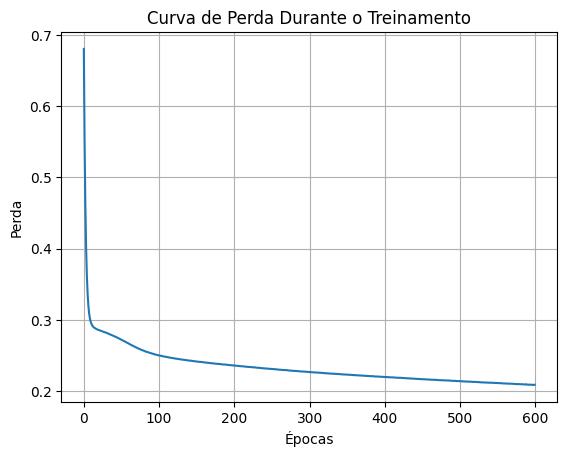

In [11]:
print("\n🔍 Matriz de Confusão:")
print(confusion_matrix(y_test, optimized_mlp_pred))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, optimized_mlp_pred))

print(f"\n✅ Acurácia: {accuracy_score(y_test, optimized_mlp_pred):.4f}")

#Curva de perda
plt.plot(optimized_mlp.loss_curve_)
plt.title("Curva de Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

KNN

K=1 → Acurácia: 0.8423
K=3 → Acurácia: 0.8642
K=5 → Acurácia: 0.8678
K=7 → Acurácia: 0.8783
K=9 → Acurácia: 0.8792
K=11 → Acurácia: 0.8771


,K,Acurácia
0,9,0.879157
1,7,0.878345
2,11,0.877129
3,5,0.867802
4,3,0.864152
5,1,0.842255


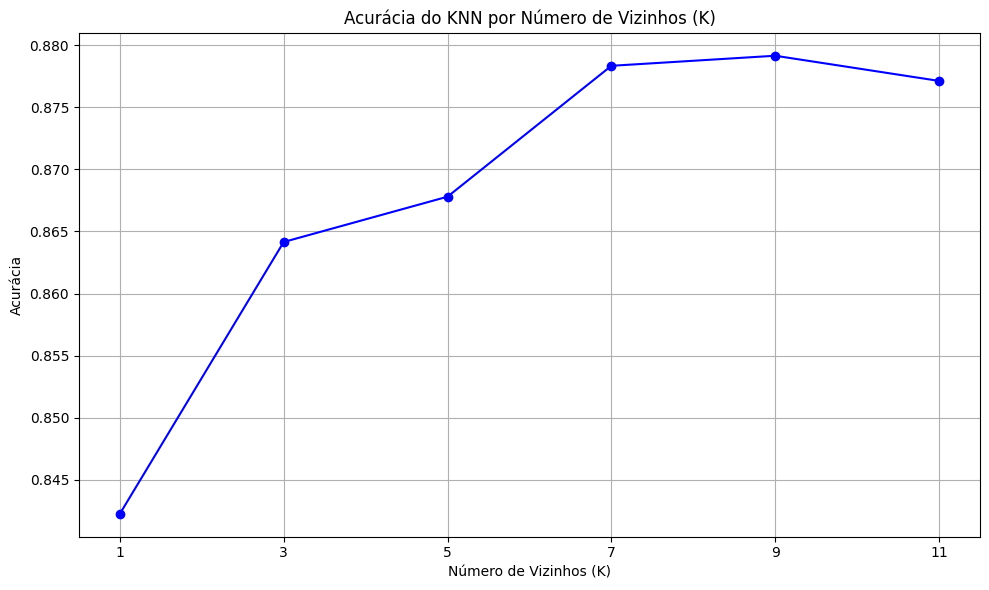


Matriz de Confusão (K=9):
[[2032   52]
 [ 246  136]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.72      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.70      2466
weighted avg       0.87      0.88      0.86      2466


Acurácia Final: 0.8792


In [6]:
# Separação dos dados para o KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Normalização exclusiva para o KNN
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)

# Teste com diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11]
accuracies_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    acc = accuracy_score(y_test_knn, y_pred)
    accuracies_knn.append(acc)
    print(f"K={k} → Acurácia: {acc:.4f}")

# Tabela da acurácia por valor de K
df_knn = pd.DataFrame({'K': k_values, 'Acurácia': accuracies_knn})
display(df_knn.sort_values(by='Acurácia', ascending=False).reset_index(drop=True))


# Gráfico mais bonito e informativo
plt.figure(figsize=(10, 6))
plt.plot(df_knn['K'], df_knn['Acurácia'], marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.title("Acurácia do KNN por Número de Vizinhos (K)")
plt.xlabel("Número de Vizinhos (K)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.tight_layout()
plt.show()


# Avaliação final com o melhor k
melhor_k = k_values[accuracies_knn.index(max(accuracies_knn))]
knn_final = KNeighborsClassifier(n_neighbors=melhor_k)
knn_final.fit(X_train_knn, y_train_knn)
y_pred_final = knn_final.predict(X_test_knn)

print(f"\nMatriz de Confusão (K={melhor_k}):")
print(confusion_matrix(y_test_knn, y_pred_final))

print("\nRelatório de Classificação:")
print(classification_report(y_test_knn, y_pred_final))

print(f"\nAcurácia Final: {accuracy_score(y_test_knn, y_pred_final):.4f}")

COMPARAÇÂO MELHOR KNN E MELHOR MLP

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.879157,0.723404,0.356021,0.477193
1,MLP,0.887267,0.672185,0.531414,0.593567


C:\Users\Higor Longuim\AppData\Local\Temp\ipykernel_13536\2163635077.py:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Higor Longuim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


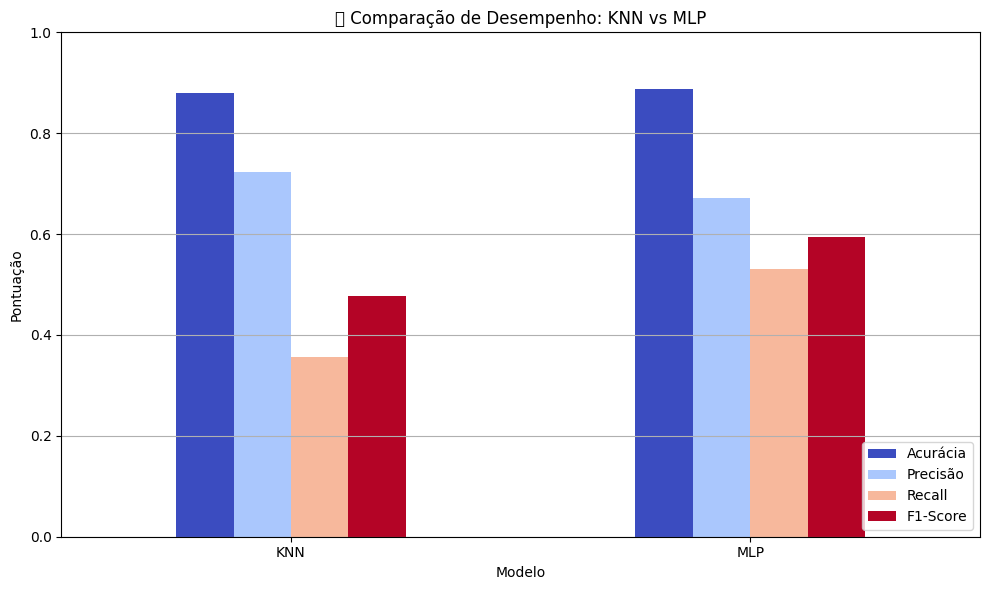


Melhor valor de K no KNN: 9

Melhores parâmetros do MLP otimizados pelo GridSearch:
{'hidden_layer_sizes': (50, 100), 'activation': 'tanh', 'alpha': 0.01, 'learning_rate_init': 0.0001, 'max_iter': 600, 'solver': 'adam'}


In [7]:
# Métricas do KNN
knn_precision = precision_score(y_test_knn, y_pred_final, zero_division=0)
knn_recall = recall_score(y_test_knn, y_pred_final, zero_division=0)
knn_f1 = f1_score(y_test_knn, y_pred_final, zero_division=0)
knn_accuracy = accuracy_score(y_test_knn, y_pred_final)

# Métricas do MLP
mlp_precision = precision_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_recall = recall_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_f1 = f1_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_accuracy = accuracy_score(y_test, optimized_mlp_pred)

# Tabela comparativa
df_comp = pd.DataFrame({
    'Modelo': ['KNN', 'MLP'],
    'Acurácia': [knn_accuracy, mlp_accuracy],
    'Precisão': [knn_precision, mlp_precision],
    'Recall': [knn_recall, mlp_recall],
    'F1-Score': [knn_f1, mlp_f1]
})

# Exibindo a tabela
display(df_comp)

# Gráfico comparativo
df_comp_plot = df_comp.set_index('Modelo')
df_comp_plot.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("🔍 Comparação de Desempenho: KNN vs MLP")
plt.ylabel("Pontuação")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Parâmetros usados
print("\nMelhor valor de K no KNN:", melhor_k)
print("\nMelhores parâmetros do MLP otimizados pelo GridSearch:")
params = {
    'hidden_layer_sizes': (50,100),
    'activation': 'tanh',
    'alpha': 0.01,
    'learning_rate_init': 0.0001,
    'max_iter': 600,
    'solver': 'adam',
}
print(params)
